In [1]:
pip install scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


# Machine Learning

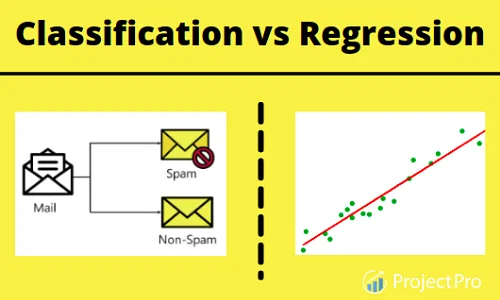

## Regresi
Model yang menghasilkan angka daripada kelas/kategori

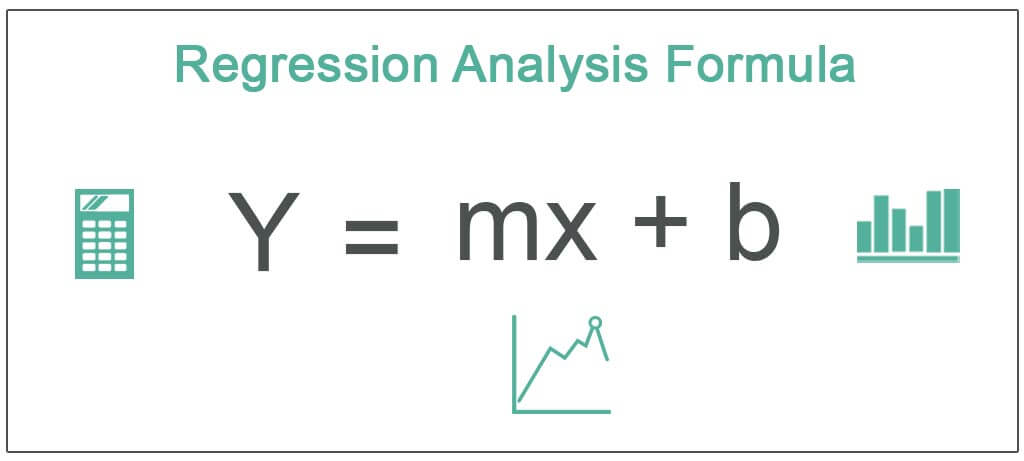

y = 2x + 3

In [2]:
x = int(input())
y = 2*x+3
print(y)

 10


23


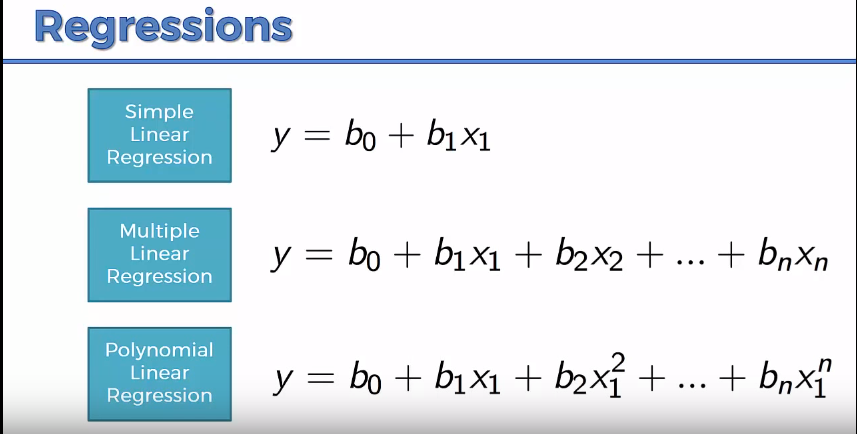

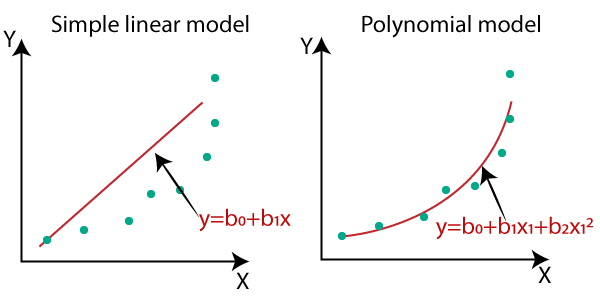

### Underfitting Overfitting

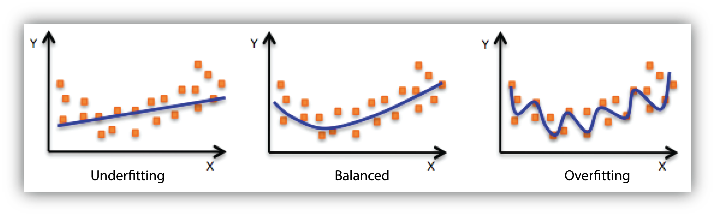

1. Metric pada Data Training jauh lebih baik dibandingkan pada data testing (overfitting)
2. Metric pada Data Training jauh lebih buruk dibandingkan pada data testing (underfitting)
3. Metric pada Data Training sama baiknya dibandingkan data testing (well-fit)

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Simple Linear Regression

In [5]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])

In [6]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [7]:
model = LinearRegression()

In [8]:
model.fit(x,y)

LinearRegression()

In [9]:
# R-Squared, makin mendekati 1 makin bagus
r_sq = model.score(x,y)
r_sq

0.7158756137479542

In [10]:
print('intercept :', model.intercept_)
print('slope:', model.coef_)

intercept : 5.633333333333329
slope: [0.54]


y = mx + b

y adalah target

m adalah slope

b adalah intercept

In [11]:
print('Formula dari Model adalah y = ',model.coef_[0],'x +', model.intercept_)

Formula dari Model adalah y =  0.54 x + 5.633333333333329


In [12]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [13]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


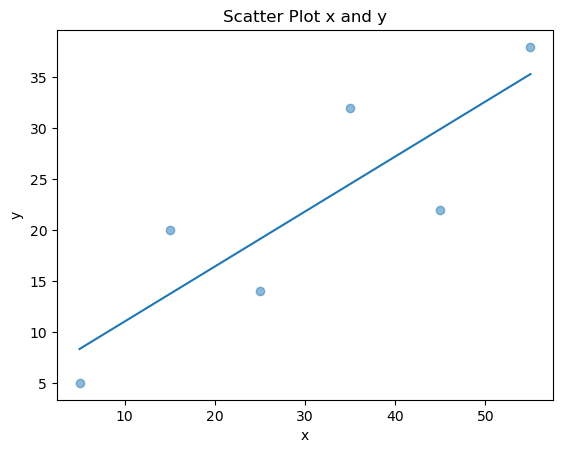

In [14]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_pred)

plt.title('Scatter Plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
x_new = np.arange(5,20,5).reshape([-1,1])
print(x_new)

[[ 5]
 [10]
 [15]]


In [16]:
y_new_pred = model.predict(x_new)
print(y_new_pred)

[ 8.33333333 11.03333333 13.73333333]


## Multiple Linear Regression

In [17]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])

y = np.array([4,5,20,14,32,22,38,43])

print(x,'\n',y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] 
 [ 4  5 20 14 32 22 38 43]


In [18]:
model = LinearRegression()

In [19]:
model.fit(x,y)

LinearRegression()

In [20]:
r_sq_multi = model.score(x,y)
r_sq_multi

0.8615939258756776

In [21]:
model.intercept_

5.522579275198183

In [22]:
model.coef_

array([0.44706965, 0.25502548])

In [23]:
print('Formula Multiple LinReg adalah y =',model.coef_[0],'x1 +',model.coef_[1],'x2 +',model.intercept_)

Formula Multiple LinReg adalah y = 0.4470696489241224 x1 + 0.2550254813137035 x2 + 5.522579275198183


In [24]:
y_pred_multi = model.predict(x)

In [25]:
y_pred_multi

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [26]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
mse_multi = mean_squared_error(y, y_pred_multi)
mse_multi

25.56187181483579

In [29]:
rmse = (mse_multi)**0.5
rmse

5.055874980142981

## Polynomial Regression

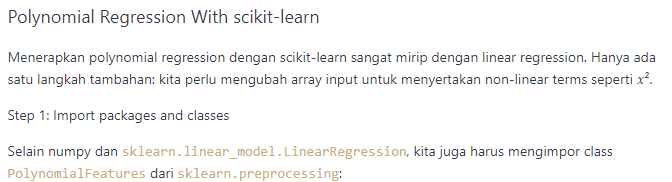

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = np.array([5,15,25,35,45,55]).reshape([-1,1])
y = np.array([15,11,2,8,25,32])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


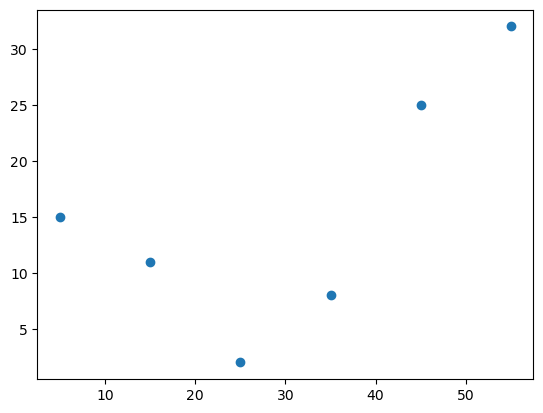

In [32]:
plt.scatter(x,y)

In [33]:
model = LinearRegression()

In [34]:
model.fit(x,y)
y_pred = model.predict(x)

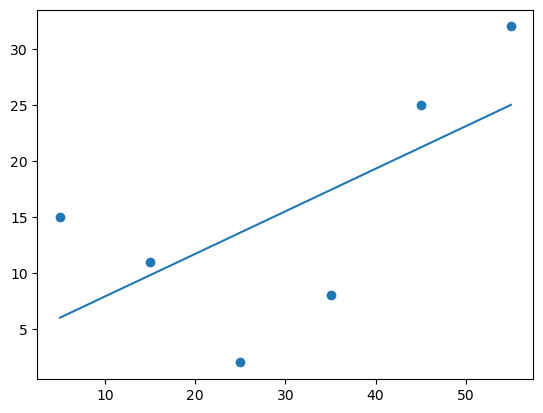

In [35]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [36]:
model.score(x,y)

0.4065969428801287

In [37]:
transformer = PolynomialFeatures(include_bias=False)

In [38]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [39]:
x_poly = transformer.transform(x)
x_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [40]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)

LinearRegression()

In [41]:
model_poly.score(x_poly,y)

0.8908516262498563

In [42]:
model.score(x,y)

0.4065969428801287

In [43]:
y_poly_pred = model_poly.predict(x_poly)

In [44]:
y

array([15, 11,  2,  8, 25, 32])

In [45]:
y_poly_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

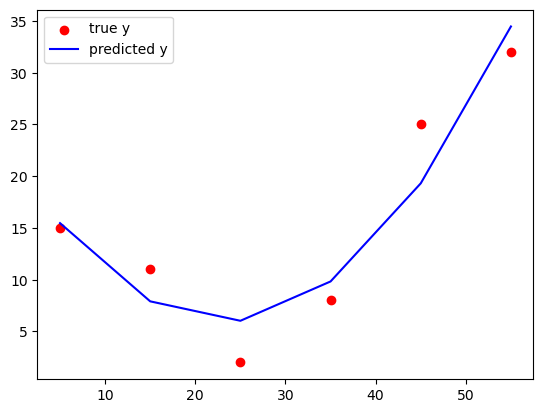

In [46]:
plt.scatter(x,y,color='red',label='true y')
plt.plot(x,y_poly_pred, color='blue', label='predicted y')
plt.legend()
plt.show()

## Multiple Polynomial Regression

In [47]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [48]:
x_poly = transformer.fit_transform(x)
model_poly = LinearRegression()
model_ = LinearRegression()
model_poly.fit(x_poly,y)
model.fit(x,y)

LinearRegression()

In [49]:
print(model.score(x,y),model_poly.score(x_poly,y))

0.8615939258756776 0.9453701449127823


In [50]:
x_0 = [i[0] for i in x]

In [51]:
x_1 = [i[1] for i in x]

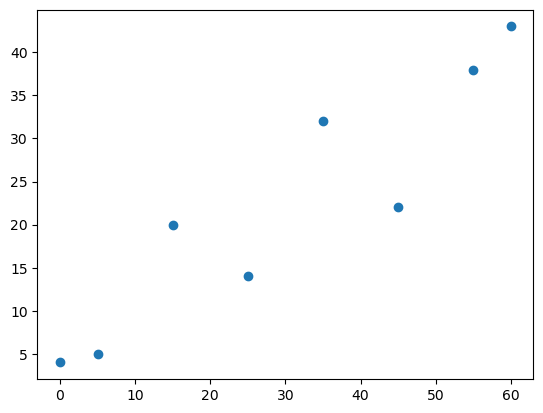

In [52]:
plt.scatter(x_0,y)

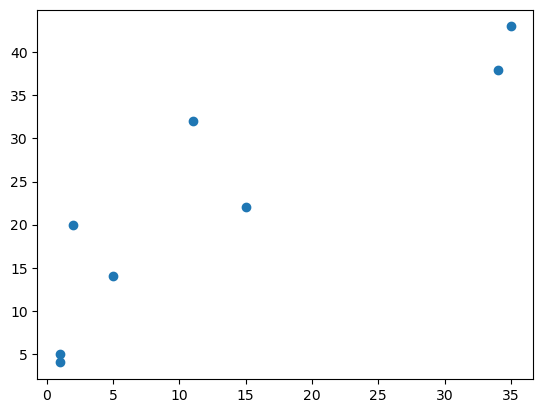

In [53]:
plt.scatter(x_1,y)

In [54]:
y_pred = model.predict(x)
y_pred_poly = model_poly.predict(x_poly)
mse = mean_squared_error(y,y_pred)
mse_poly = mean_squared_error(y,y_pred_poly)
rmse = np.sqrt(mse)
rmse_poly = np.sqrt(mse_poly)
print(rmse,rmse_poly)

5.055874980142981 3.1763896740514275


## Advanced Linear Regression with Statsmodels

In [55]:
import statsmodels.api as sm

In [56]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [57]:
x = sm.add_constant(x)

In [58]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [59]:
model_stat = sm.OLS(y,x)

In [60]:
results = model_stat.fit()

In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 06 Apr 2023   Prob (F-statistic):            0.00713
Time:                        20:20:01   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

formula regresi: y = 5.5226 + 0.4471x1 + 0.2550x2

In [62]:
print('rsquared:',results.rsquared)

rsquared: 0.8615939258756776


In [63]:
results.params

array([5.52257928, 0.44706965, 0.25502548])

In [64]:
res_summary = results.summary()
res_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.5226,4.431,1.246,0.268,-5.867,16.912
x1,0.4471,0.285,1.567,0.178,-0.286,1.180
x2,0.2550,0.453,0.563,0.598,-0.910,1.420


In [65]:
res_summary.tables[0]

Dep. Variable:,y,R-squared:,0.862
Model:,OLS,Adj. R-squared:,0.806
Method:,Least Squares,F-statistic:,15.56
Date:,"Thu, 06 Apr 2023",Prob (F-statistic):,0.00713
Time:,20:20:01,Log-Likelihood:,-24.316
No. Observations:,8,AIC:,54.63
Df Residuals:,5,BIC:,54.87
Df Model:,2,,
Covariance Type:,nonrobust,,


In [66]:
y_pred = results.predict(x)

In [67]:
mse = mean_squared_error(y,y_pred)

In [68]:
np.sqrt(mse)

5.055874980142981

## Implementing Linear Regression on Real Dataset

In [69]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd

In [70]:
df = pd.read_csv('BostonHousing.csv')

In [71]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [72]:
x = df.drop('medv',axis=1)
y = df['medv']

In [73]:
x=x[['rm']]
model = sm.OLS(y,x)
results = model.fit()
predictions = results.predict(x)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):                   3.74e-256
Time:                        20:20:02   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

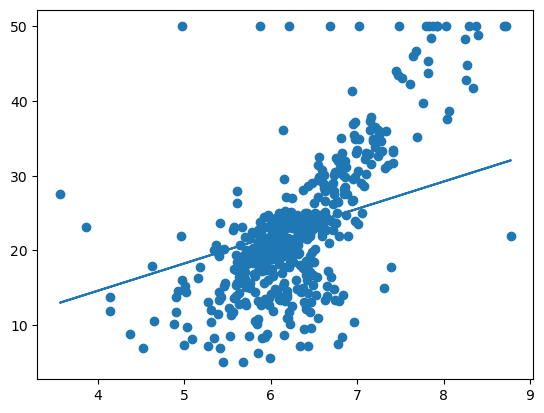

In [74]:
plt.scatter(x,y)
plt.plot(x,predictions)

### Use SKLEARN for Boston

In [75]:
X = df.drop('medv',1)
y = df['medv']

In [76]:
linreg = LinearRegression()

In [77]:
linreg.fit(X,y)

LinearRegression()

In [78]:
y_pred = linreg.predict(X)

In [79]:
linreg.score(X,y)

0.7406426641094095

### Contoh kedua SKLEARN

In [80]:
df = pd.read_csv('CarPrice_Assignment.csv', usecols=['horsepower','price'])
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


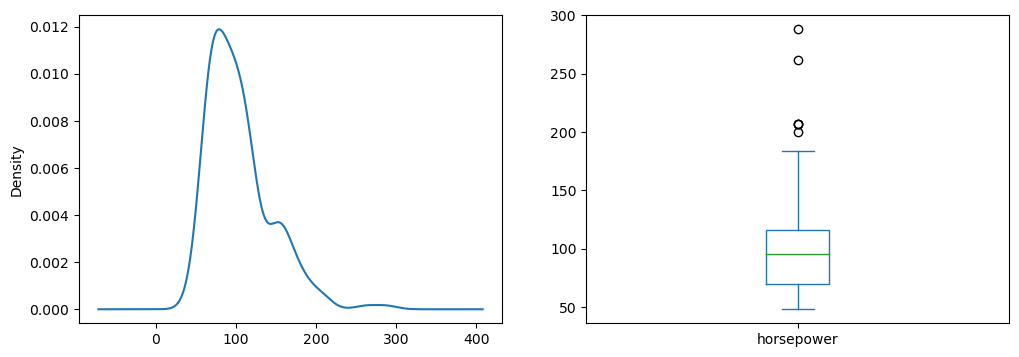

In [81]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
df['horsepower'].plot(kind='box')

plt.show()

Text(0.5, 0, 'horsepower')

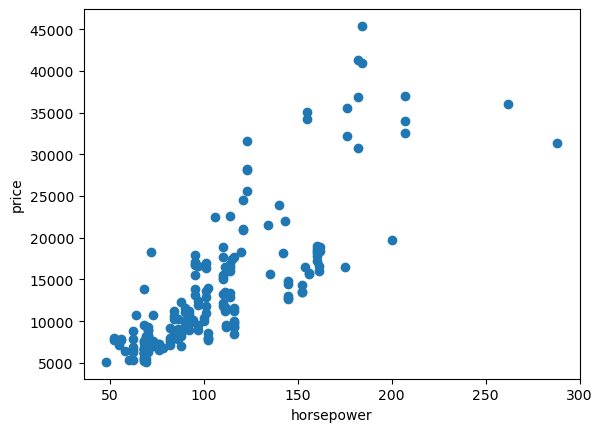

In [82]:
X = df['horsepower']
y = df['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('horsepower')

In [83]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [84]:
X = X.to_frame()

## Data Splitting
untuk mengurangi overfitting dan underfitting

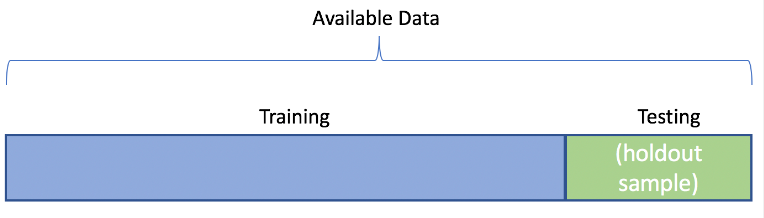

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [87]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [88]:
linreg.score(X_train,y_train)

0.6571488067100201

In [89]:
y_pred = linreg.predict(X_test)

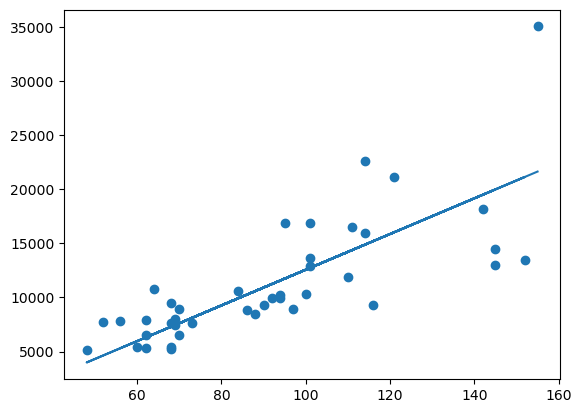

In [90]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [91]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [92]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

print('train mse:',mse_train)
print('test mse',mse_test)

train mse: 23997586.52540585
test mse 14199537.525722262
